# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [3]:
dataset = get_dataset(r"/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [4]:
print(dataset)  #To check the contents of the dataset. 
#It includes the image, the groundtruths, image shape, etc.
# 

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [5]:
def display_images(batch):
    try:
    # TODO - Your implementation here

    # To plot the image
        color_code = {1:'red' , 2:'blue', 3:'green'}
        f, ax = plt.subplots(figsize=(6,6))
        image = batch["image"].numpy()
        bboxes = batch["groundtruth_boxes"].numpy()
        classes = batch["groundtruth_classes"].numpy()
        img_height = image.shape[1]
        img_width = image.shape[0]
        ax.imshow(image)

        for bb, label in zip(bboxes, classes):
            y1,x1,y2,x2 = bb
            xy = (x1*img_width, y1*img_height)
            width = (x2 - x1) * img_width
            height = (y2-y1) * img_height
            rec = patches.Rectangle(xy,width,height, edgecolor=color_code[label], facecolor='none')
            ax.add_patch(rec)
        plt.show()
    except Exception as err:
        print(err)


## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

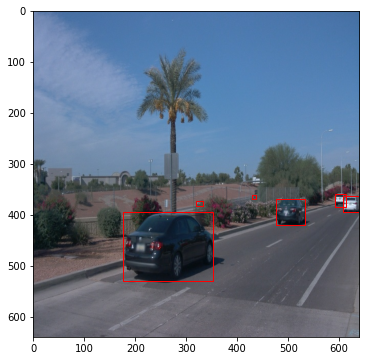

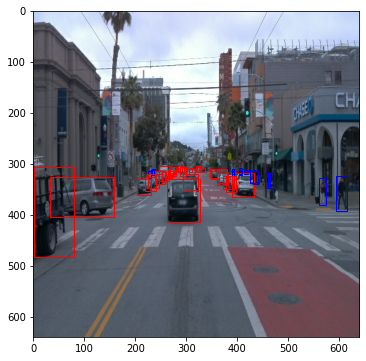

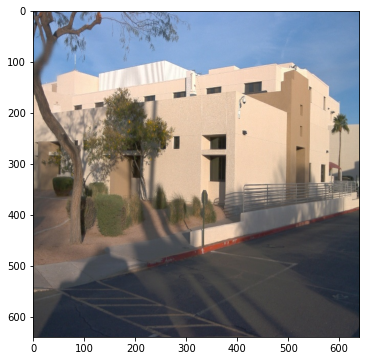

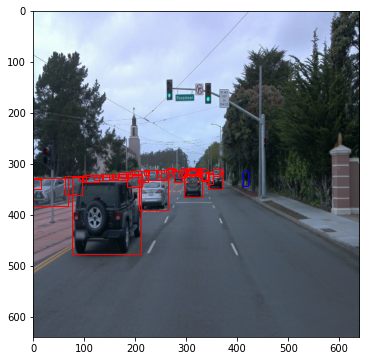

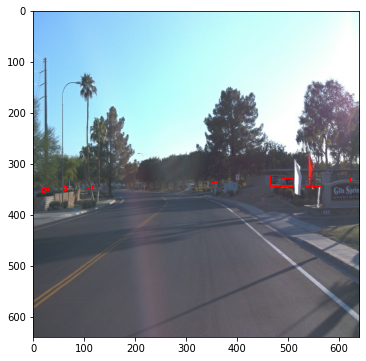

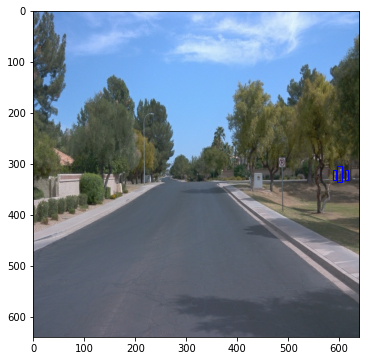

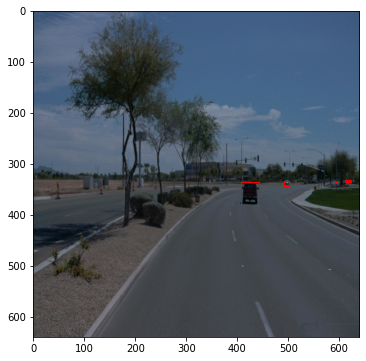

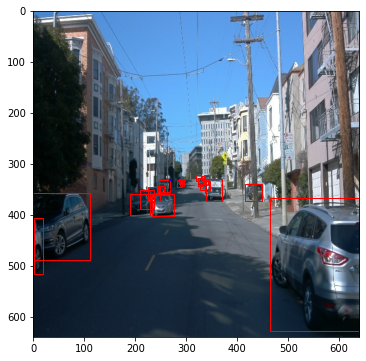

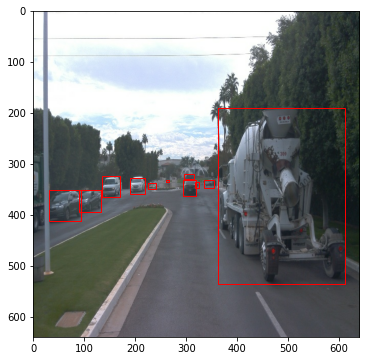

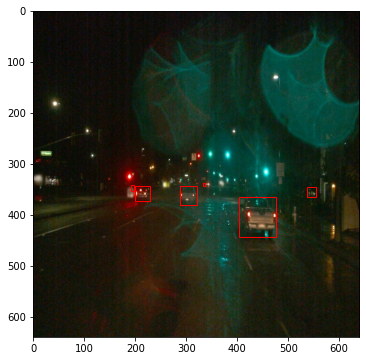

In [6]:
# Display 10 random images in dataset
num = 10
for i in range(num):
    for batch in dataset.shuffle(75, reshuffle_each_iteration=True).take(1):
        display_images(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [7]:
class_count = {1:0, 2:0, 4:0}
image_count = {1:[], 2:[], 4:[]}
# Vehicles - 1, pedestrians - 2, cylists - 4
for batch in dataset.take(10000):
    try:
        classes = batch["groundtruth_classes"].numpy()
        val, counts = np.unique(classes,return_counts=True)
         
        for i,j in zip(val,counts):
            class_count[i] = class_count.get(i) + j
            image_count[i].append(j)
    except Exception as err:
        print(err)

total_classes = {'vehicles': class_count[1], 'pedestrians':class_count[2], 'cyclists':class_count[4]}
labels_per_image = {'vehicles': image_count[1], 'pedestrians':image_count[2], 'cyclists':image_count[4]}

print(total_classes)

{'vehicles': 172640, 'pedestrians': 48158, 'cyclists': 1243}


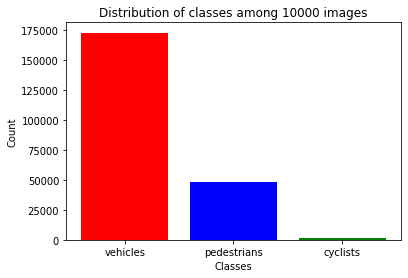

In [8]:
# Plotting a histogram of the label count
color_code = {'vehicles':'red' , 'pedestrians':'blue', 'cyclists':'green'}

plt.bar(range(len(total_classes)), total_classes.values(), color = [color_code[key] for key in total_classes])
plt.xticks(range(len(total_classes)), total_classes.keys())
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of classes among 10000 images')
plt.show()
#ax = sns.barplot(x = list(labels.keys()), y = [labels.values()])
#ax.set(xlabel = 'Classes', ylabel = 'Count', Title="Distributionof classes for 10000 random images")

In [9]:
''' From the above distribution plot it is clear that the number of cyclists is significantly lower than 
the other two classes.'''

' From the above distribution plot it is clear that the number of cyclists is '

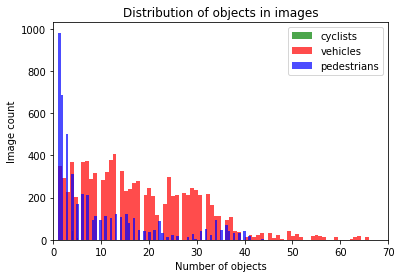

In [10]:
kwargs = dict(alpha=0.5, bins=80)
plt.hist(labels_per_image['vehicles'], **kwargs, color='r', label = 'vehicles')
plt.hist(labels_per_image['pedestrians'], **kwargs, color='b', label = 'pedestrians')
plt.hist(labels_per_image['cyclists'], **kwargs, color='g', label = 'cyclists')
plt.gca().set(title = "Distribution of objects in images", xlabel="Number of objects",ylabel="Image count")
plt.xlim(0,70)
plt.legend();

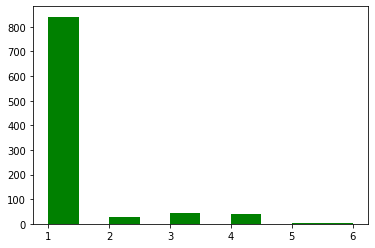

In [30]:
# Plotting the histogram for cyclists (th)
plt.hist(labels_per_image['cyclists'], color='g', label = 'cyclists')
plt.show()

In [ ]:
'''The above two plots give us an idea about the distribution of these three objects in our dataset.The class 
cyclists is thee lowest in frequency among the three classses. This is also verified by the first distribution 
plot.'''